In [276]:
import pandas as pd
from pandas import read_csv

import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
from matplotlib.animation import FuncAnimation

In [385]:
# Data loading/extraction

# https://en.wikipedia.org/wiki/Athletics_at_the_2016_Summer_Olympics_%E2%80%93_Men%27s_100_metres
# reaction_sec = No. of secs taken by the athlete to react to green signal/gun shot
# time_sec = Time taken to complete the race
# win_mpers = wind speed during that race in meter/sec.

file_name = '2016_olympic_100m.txt'
col_names = ['rnk','lane','name','nation','reaction_sec','time_sec','notes','round','subround','itrn','wind_mpers']
df = read_csv(file_name, sep='\t', names=col_names)
df['year'] = 2016
df['champ'] = 'Olympics'
df['event'] = '100m'
df

,rnk,lane,name,nation,reaction_sec,time_sec,notes,round,subround,itrn,wind_mpers,year,champ,event
0,1,9,Riste Pandev,Macedonia,0.145,10.72,"Q, SB",Prelim,Heat,1,-0.2,2016,Olympics,100m
1,2,8,Sudirman Hadi,Indonesia,0.136,10.77,Q,Prelim,Heat,1,-0.2,2016,Olympics,100m
2,3,4,Mohammed Abukhousa,Palestine,0.176,10.82,q,Prelim,Heat,1,-0.2,2016,Olympics,100m
3,4,5,Holder da Silva,Guinea-Bissau,0.165,10.97,NaN,Prelim,Heat,1,-0.2,2016,Olympics,100m
4,5,6,Wilfried Bingangoye,Gabon,0.145,11.03,NaN,Prelim,Heat,1,-0.2,2016,Olympics,100m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,4,9,Yohan Blake,Jamaica,0.145,9.93,SB,Final,Final,1,0.2,2016,Olympics,100m
120,5,3,Akani Simbine,South Africa,0.128,9.94,NaN,Final,Final,1,0.2,2016,Olympics,100m
121,6,8,Ben Youssef Meïté,Ivory Coast,0.156,9.96,NR,Final,Final,1,0.2,2016,Olympics,100m
122,7,5,Jimmy Vicaut,France,0.140,10.04,NaN,Final,Final,1,0.2,2016,Olympics,100m


In [190]:
# Data Inspection

#print(df.dtypes)
# ACTION: Columns rank and time_sec are of type 'object' as it has non-numeric values. Check and keep it as 'int/float'.

#df.shape
#df.size

#column: rank

#df.rnk.unique()
### array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '–',
###       '1st place, gold medalist(s)', '2nd place, silver medalist(s)',
###       '3rd place, bronze medalist(s)'], dtype=object)
# ACTION: Remove records with value "-" as either the athelete did not start (DNS) or disqualified (DS)
# ACTION: '1st place, gold medalist(s)',.. convert them to have only the rank (1,2,3) number not the text(place,gold..)

#column: lane

#df['lane'].unique()
### array([9, 8, 4, 5, 6, 2, 7, 3, 1], dtype=int64)

#column: reaction_sec

#df['reaction_sec'].unique()

#column: time_sec

#df['time_sec'].unique()


array([10.72, 10.77, 10.82, 10.97, 11.03, 11.05, 11.56, 11.81, 10.43,
       10.76, 11.04, 11.34, 11.51, 11.65, 10.53, 10.84, 10.92, 10.95,
       11.42, 11.44, 10.13, 10.16, 10.26, 10.28, 10.47, 10.01, 10.2 ,
       10.23, 10.27, 10.29, 10.37, 10.64, 10.71, 10.08, 10.17, 10.18,
       10.34, 10.39, 10.04, 10.19, 10.22, 10.31, 10.68, 10.7 , 10.03,
       10.11, 10.14, 10.25, 10.33, 10.36, 10.07, 10.12, 10.79, 10.24,
       10.55, 11.89,  9.95,  9.97,  9.98, 10.05,  9.86,  9.92,  9.94,
        9.81,  9.89,  9.91,  9.93,  9.96, 10.06])

In [191]:
# Check for null/NA
dfnull = pd.DataFrame(df.count())
dfnull.columns = ['Non_NA_Rows']
dfnull['NA_Rows'] = df.shape[0] - dfnull.Non_NA_Rows
#dfnull.insert(1, 'NA_Rows', df.shape[0] - dfna[0], True)
dfnull['Total_Rows'] = df.shape[0]
dfnull

# NULL/NA values in the 'notes' column is expected, can be ignored as this wont participate in the exercise.

,Non_NA_Rows,NA_Rows,Total_Rows
rnk,121,0,121
lane,121,0,121
name,121,0,121
nation,121,0,121
reaction_sec,121,0,121
time_sec,121,0,121
notes,50,71,121
round,121,0,121
subround,121,0,121
itrn,121,0,121


In [187]:
df[(df['reaction_sec'].isnull() == True)]

,rnk,lane,name,nation,reaction_sec,time_sec,notes,round,subround,itrn,wind_mpers,year,champ,event


In [386]:
# Data cleaning

# Rows starting with rank as "-", can be ignored as either the athelete did not start (DNS) or disqualified (DS)
df = df[(df['rnk'] != '–')]

# Rows starting with rank as "-", can be ignored as either the athelete did not start (DNS) or disqualified (DS)
df = df[(df['reaction_sec'].isnull() == False)]

#Rank of Final round, has medeal details in rank column. This will be ignored and only the place is considered.
df['rnk'] = df['rnk'].str[0]

#column rank,time_sec is of type object, change it to int
df = df.astype({'rnk': int, 'time_sec':float})

In [370]:
df.describe()

,rnk,lane,reaction_sec,time_sec,itrn,wind_mpers,year
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0
mean,4.561983,5.231405,0.145140,10.394050,3.338843,-0.209091,2016.0
std,2.380100,2.421296,0.013874,0.460425,2.278719,0.583381,0.0
min,1.000000,1.000000,0.107000,9.810000,1.000000,-1.300000,2016.0
25%,3.000000,3.000000,0.136000,10.120000,1.000000,-0.500000,2016.0
50%,5.000000,5.000000,0.145000,10.240000,3.000000,-0.100000,2016.0
75%,7.000000,7.000000,0.154000,10.470000,5.000000,0.200000,2016.0
max,9.000000,9.000000,0.178000,11.890000,8.000000,0.800000,2016.0


In [ ]:
# Data preprocessing

# No standardization / Normalization applied

In [353]:
df.loc[:,['reaction_sec','time_sec','wind_mpers']].corr(method ='pearson')

# Understand the correlation between above 3 variables

# Reaction time of an athlete is postively correlated to time_sec (0.210476) => As the reaction time increases,
# the time taken to complete the race also increases.

# wind speed is negatively correlated to time_sec (-0.063121) => As the wind speed increases,
# the time taken to complete the race decreases.  WIND is favoring the athelete.

# wind speed correlation to reaction time is almost zero (0.024252). 
# This makes sense as the reaction time is not dependant/related to the wind speed.

,reaction_sec,time_sec,wind_mpers
reaction_sec,1.000000,0.210476,0.024252
time_sec,0.210476,1.000000,-0.063121
wind_mpers,0.024252,-0.063121,1.000000


Text(0, 0.5, 'Race time (secs)')

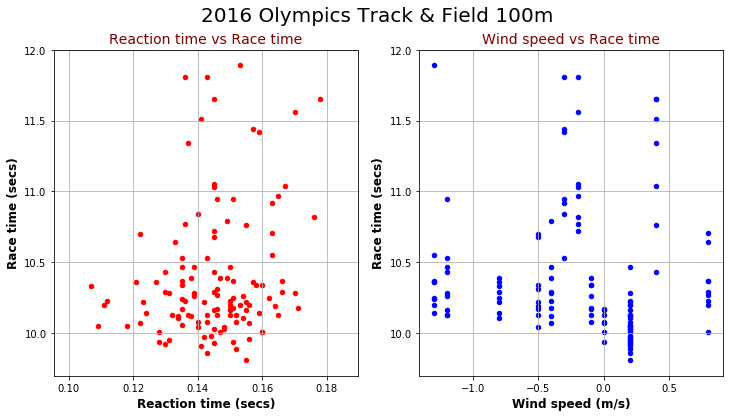

In [371]:
# Data Visualization

#fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle(t="2016 Olympics Track & Field 100m", size=20)
#reaction_sec ~ time_sec

df.plot(x='reaction_sec', y='time_sec', kind='scatter', color='red', grid=True, ax=ax1)
ax1.set_title("Reaction time vs Race time", color = 'maroon', size = 14)
ax1.set_xlabel("Reaction time (secs)", size=12, weight='bold')
ax1.set_ylabel("Race time (secs)", size=12, weight='bold')

df.plot(x='wind_mpers', y='time_sec', kind='scatter', color='blue', grid=True, ax=ax2)
ax2.set_title("Wind speed vs Race time", color = 'maroon', size = 14)
ax2.set_xlabel("Wind speed (m/s)", size=12, weight='bold')
ax2.set_ylabel("Race time (secs)", size=12, weight='bold')


In [425]:
df.loc[df['round'] == "Final", ['time_sec']]

,time_sec
116,9.81
117,9.89
118,9.91
119,9.93
120,9.94
121,9.96
122,10.04
123,10.06


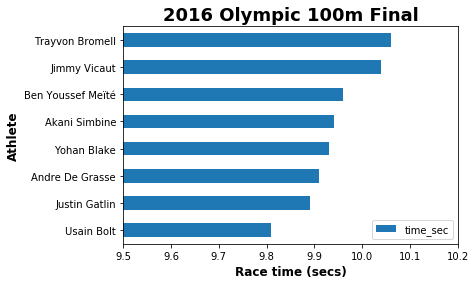

In [430]:
df.loc[df['round'] == "Final", ['name','time_sec']].plot(x='name', y='time_sec', kind='barh', xlim=(9.5,10.2))
plt.title('2016 Olympic 100m Final', size=18, weight='bold')
plt.ylabel('Athlete', size=12, weight='bold')
plt.xlabel('Race time (secs)', size=12, weight='bold')
plt.show()


In [398]:
# Data modelling
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [436]:
df

,rnk,lane,name,nation,reaction_sec,time_sec,notes,round,subround,itrn,wind_mpers,year,champ,event
0,1,9,Riste Pandev,Macedonia,0.145,10.72,"Q, SB",Prelim,Heat,1,-0.2,2016,Olympics,100m
1,2,8,Sudirman Hadi,Indonesia,0.136,10.77,Q,Prelim,Heat,1,-0.2,2016,Olympics,100m
2,3,4,Mohammed Abukhousa,Palestine,0.176,10.82,q,Prelim,Heat,1,-0.2,2016,Olympics,100m
3,4,5,Holder da Silva,Guinea-Bissau,0.165,10.97,NaN,Prelim,Heat,1,-0.2,2016,Olympics,100m
4,5,6,Wilfried Bingangoye,Gabon,0.145,11.03,NaN,Prelim,Heat,1,-0.2,2016,Olympics,100m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,4,9,Yohan Blake,Jamaica,0.145,9.93,SB,Final,Final,1,0.2,2016,Olympics,100m
120,5,3,Akani Simbine,South Africa,0.128,9.94,NaN,Final,Final,1,0.2,2016,Olympics,100m
121,6,8,Ben Youssef Meïté,Ivory Coast,0.156,9.96,NR,Final,Final,1,0.2,2016,Olympics,100m
122,7,5,Jimmy Vicaut,France,0.140,10.04,NaN,Final,Final,1,0.2,2016,Olympics,100m


In [451]:
# Prepare train and test datasets

inputx = df.loc[:,['reaction_sec']]
inputy = df.loc[:,['time_sec']]

input_train, input_test, output_train, output_test = train_test_split(inputx, inputy, test_size =1/6, random_state=0)
print("input_train: ", len(input_train))
print("input_test: ", len(input_test))
print("output_train: ", len(output_train))
print("output_test: ", len(output_test))

input_train:  100
input_test:  21
output_train:  100
output_test:  21


In [452]:
# Using Simple Linear Regression model to train
model = LinearRegression()
model.fit(input_train, output_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [453]:
# Test the model

predicted_output = model.predict(input_test)
print(predicted_output)

[[10.41486244]
 [10.41486244]
 [10.21567107]
 [10.29534762]
 [10.32190647]
 [10.40158302]
 [10.33518589]
 [10.54101698]
 [10.48125957]
 [10.51445813]
 [10.17583279]
 [10.40158302]
 [10.60077439]
 [10.46798014]
 [10.32854618]
 [10.32190647]
 [10.43478158]
 [10.43478158]
 [10.32854618]
 [10.42814187]
 [10.30198733]]


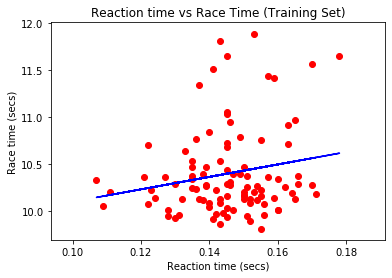

In [454]:
# Visualising the train results

plt.scatter(input_train, output_train, color='red')
plt.plot(input_train, model.predict(input_train), color='blue')
plt.title('Reaction time vs Race Time (Training Set)')
plt.xlabel('Reaction time (secs)')
plt.ylabel('Race time (secs)')
plt.show()

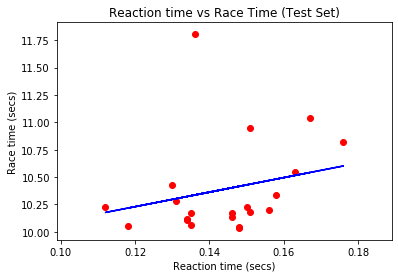

In [455]:
# Test dataset

plt.scatter(input_test, output_test, color='red')
plt.plot(input_test, model.predict(input_test), color='blue')
plt.title('Reaction time vs Race Time (Test Set)')
plt.xlabel('Reaction time (secs)')
plt.ylabel('Race time (secs)')
plt.show()